<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Example-3" data-toc-modified-id="Example-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example 3</a></span></li><li><span><a href="#Example-4" data-toc-modified-id="Example-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example 4</a></span></li><li><span><a href="#Example-5" data-toc-modified-id="Example-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Example 5</a></span></li><li><span><a href="#Example-6" data-toc-modified-id="Example-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Example 6</a></span></li><li><span><a href="#Export-color-maps-for-abaqus" data-toc-modified-id="Export-color-maps-for-abaqus-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Export color maps for abaqus</a></span></li></ul></div>


    ██╗     ███████╗ ██████╗ ███████╗███╗   ██╗██████╗ 
    ██║     ██╔════╝██╔════╝ ██╔════╝████╗  ██║██╔══██╗
    ██║     █████╗  ██║  ███╗█████╗  ██╔██╗ ██║██║  ██║
    ██║     ██╔══╝  ██║   ██║██╔══╝  ██║╚██╗██║██║  ██║
    ███████╗███████╗╚██████╔╝███████╗██║ ╚████║██████╔╝
    ╚══════╝╚══════╝ ╚═════╝ ╚══════╝╚═╝  ╚═══╝╚═════╝ 

                    (wait for it...)

                 █████╗ ██████╗ ██╗   ██╗                          
                ██╔══██╗██╔══██╗╚██╗ ██╔╝                          
                ███████║██████╔╝ ╚████╔╝                           
                ██╔══██║██╔══██╗  ╚██╔╝                            
                ██║  ██║██║  ██║   ██║                             
                ╚═╝  ╚═╝╚═╝  ╚═╝   ╚═╝  

        generate nice legends for your contour
          plots with latex text complier and
           export them as a vector graphic!
           
                created by: T. Ceglar


                L E G A L   N O T I C E
    Neither the author nor the Institute of Lightweight
    Design and Structural Biomechanics (ILSB) make any 
     warranty, express or implied, or assume any legal 
    liability or responsibility for the accuracy, use-
    fulness or completeness of any information contained
           in or obtained with this program.


In [1]:
# libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import savefig

In [2]:
# matplotlib style
mpl.style.use('default')

# importing paths and shapes
from matplotlib.path import Path
import matplotlib.patches as patches

# importing matplotlib color maps
from matplotlib.cm import *

# rgb color codes to hex
from matplotlib.colors import rgb2hex

# transforming image
import matplotlib.transforms as mtransforms

# Color maps
Showcase of the readily available color maps in matplotlib.
To use them simply specify the name from the following showcase!
To **reverse** them simply add _r to the end of the name

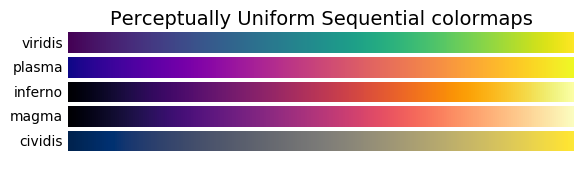

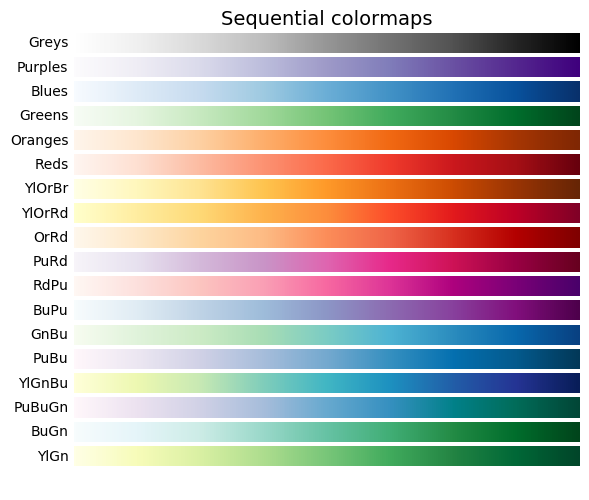

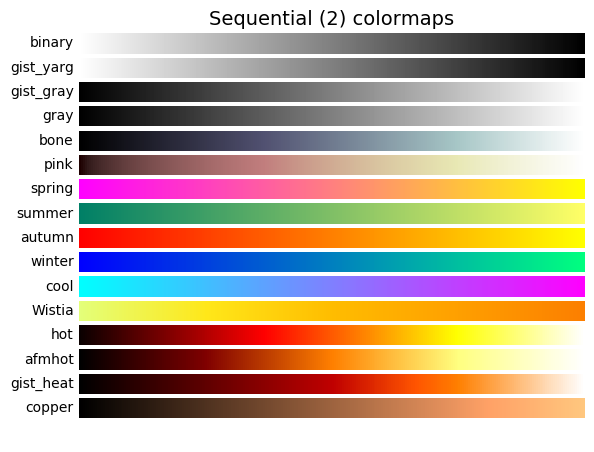

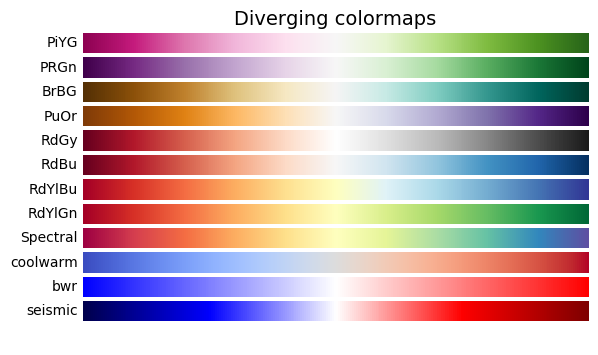

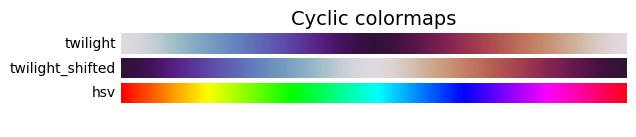

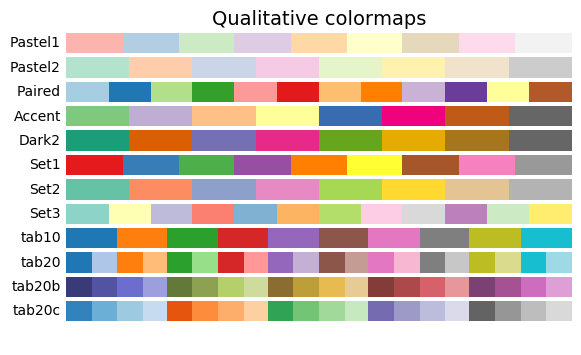

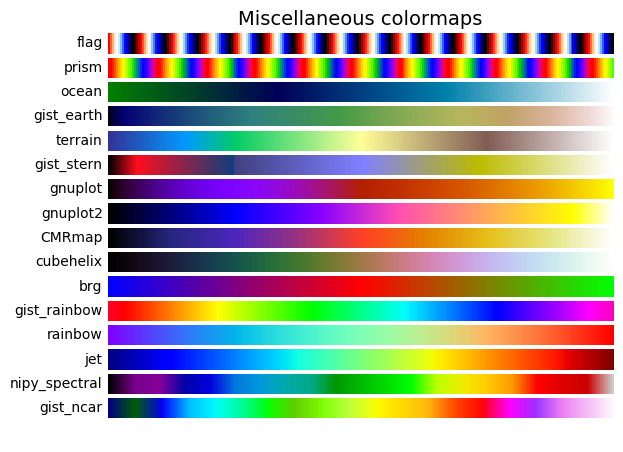

In [3]:
import warnings
warnings.filterwarnings('ignore')

a = np.linspace(0, 1, 256).reshape(1,-1)
a = np.vstack((a,a))

mpl.rc('text', usetex=False)
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

# plt.show();
mpl.rc('text', usetex=True)

# Horizontal legends

## Example 1

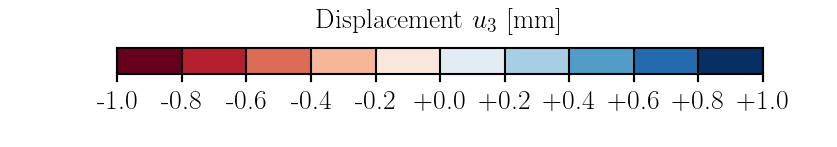

In [4]:
###### USER INPUT #########################################

name = "Displacement $u_{3}$ [mm]" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = RdBu

# set the max, min and number of divisons
max_value = 1
min_value = -1
nval = 10 # the number of range annotations

div = nval # the number of divisions in the colormap legend

###### GLOBAL FONT SETTINGS ##############################
# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(10,1))# specify the size

ax = plt.subplot(1, 1, 1)
ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
ax.set_ylim(-0.1,0.2)
ax.set_xlim(-0.1,1.1)

# rectangular
rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# vertical lines and values
for d in np.arange(div+1):
    ax.plot((d/div,d/div),(0.1,-0.03),'k-',lw=1.5) # (un)comment to use vertical line separators

for v,i in zip(values,np.arange(nval+1)):
    ax.plot((i/nval,i/nval),(0,-0.03),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
    ax.annotate('{0:+.1f}'.format(v),xy=(i/nval,-0.05),ha='center',va='top') # (un)comment to use horizontal annotations
#     ax.annotate('{0:.2e}'.format(v),xy=(i/nval,-0.02),ha='left',va='top',rotation=-45) # (un)comment to rotated annotations

#ax.annotate('{0}'.format(min_value),xy=(-0.02,0.05),ha='right',va='center') # (un)comment to use min/max values on the side
#ax.annotate('{0}'.format(max_value),xy=(1.02,0.05),ha='left',va='center') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(0.5,0.14),ha='center',va='bottom',fontsize=None) # specify the fontsize if diff than default

###### SAVE FIGURE ##############################

savefig('example1.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

## Example 2

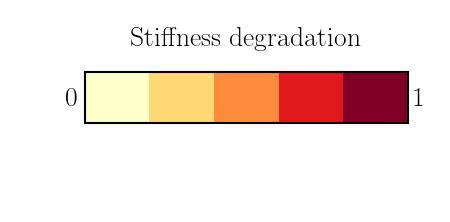

In [5]:
###### USER INPUT #########################################

name = "Stiffness degradation" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = YlOrRd

# set the max, min and number of divisons
max_value = 1
min_value = 0
nval = 5 # the number of range annotations

div = nval # the number of divisions in the colormap legend

###### GLOBAL FONT SETTINGS ##############################
# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(5,2)) # specify the size

ax = plt.subplot(1, 1, 1)
ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
ax.set_ylim(-0.1,0.2)
ax.set_xlim(-0.1,1.1)

# rectangular
rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# vertical lines and values
# for d in np.arange(div+1):
#     ax.plot((d/div,d/div),(0.1,-0.03),'k-',lw=1.5) # (un)comment to use vertical line separators

# for v,i in zip(values,np.arange(nval+1)):
#     ax.plot((i/nval,i/nval),(0,-0.03),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
#     ax.annotate('{0:.1f}'.format(v),xy=(i/nval,-0.05),ha='center',va='top') # (un)comment to use horizontal annotations
#     ax.annotate('{0:.2e}'.format(v),xy=(i/nval,-0.02),ha='left',va='top',rotation=-45) # (un)comment to rotated annotations

ax.annotate('{0}'.format(min_value),xy=(-0.02,0.05),ha='right',va='center') # (un)comment to use min/max values on the side
ax.annotate('{0}'.format(max_value),xy=(1.02,0.05),ha='left',va='center') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(0.5,0.14),ha='center',va='bottom',fontsize=None) # specify the fontsize if diff than default

###### SAVE FIGURE ##############################

savefig('example2.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

## Example 3

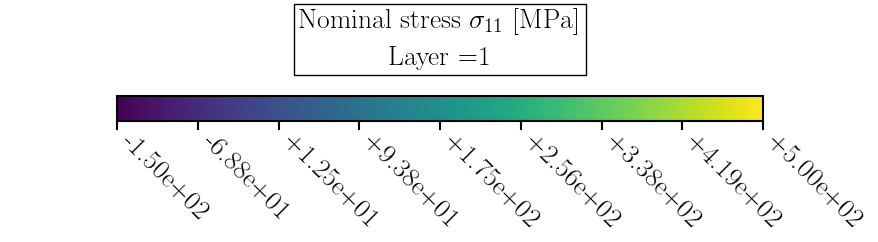

In [6]:
###### USER INPUT #########################################

name = "Nominal stress $\sigma_{11}$ [MPa]\nLayer =1" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = viridis

# set the max, min and number of divisons
max_value = 500
min_value = -150
nval = 8 # the number of range annotations

div = 256 # the number of divisions in the colormap legend (256 is max value!)

###### GLOBAL FONT SETTINGS ##############################

# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(10,1))# specify the size

ax = plt.subplot(1, 1, 1)
ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
ax.set_ylim(-0.1,0.2)
ax.set_xlim(-0.1,1.1)

# rectangular
rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# vertical lines and values
# for d in np.arange(div+1):
#     ax.plot((d/div,d/div),(0.1,-0.03),'k-',lw=1.5) # (un)comment to use vertical line separators

for v,i in zip(values,np.arange(nval+1)):
    ax.plot((i/nval,i/nval),(0,-0.03),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
#     ax.annotate('{0:.1f}'.format(v),xy=(i/nval,-0.05),ha='center',va='top') # (un)comment to use horizontal annotations
    ax.annotate('{0:+.2e}'.format(v),xy=(i/nval,-0.02),ha='left',va='top',rotation=-45) # (un)comment to rotated annotations

# ax.annotate('{0}'.format(min_value),xy=(-0.02,0.05),ha='right',va='center') # (un)comment to use min/max values on the side
# ax.annotate('{0}'.format(max_value),xy=(1.02,0.05),ha='left',va='center') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(0.5,0.2),ha='center',va='bottom',fontsize=None, bbox=dict(facecolor='none', edgecolor=None)) # specify the fontsize if diff than default

###### SAVE FIGURE ##############################

savefig('example3.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

# Vertical legends
## Example 4

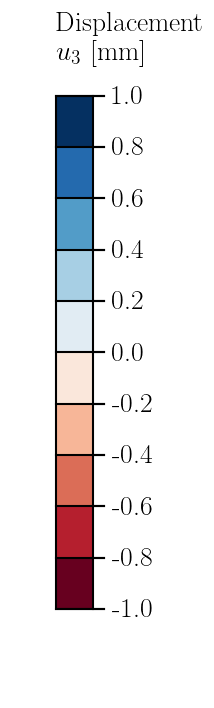

In [7]:
###### USER INPUT #########################################

name = "Displacement\n$u_{3}$ [mm]" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = RdBu

# set the max, min and number of divisons
max_value = 1
min_value = -1
nval = 10 # the number of range annotations

div = nval # the number of divisions in the colormap legend

###### GLOBAL FONT SETTINGS ##############################

# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # uses Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(1,8)) # change the size of the legend 

ax = plt.subplot(1, 1, 1)

im = ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
trans_data = mtransforms.Affine2D().rotate_deg(90)+ ax.transData
im.set_transform(trans_data)
    
ax.set_xlim(-0.11,0.1)
ax.set_ylim(-0.1,1.1)

rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
rect.set_transform(trans_data)
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# horizontal lines and values
for d in np.arange(div+1):
    ax.plot((-0.1,0.03),(d/div,d/div),'k-',lw=1.5) # (un)comment to use vertical separators
    
for v,i in zip(values,np.arange(nval+1)):
    ax.plot((0,0.03),(i/nval,i/nval),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
    ax.annotate('{0:.1f}'.format(v),xy=(0.05,i/nval),ha='left',va='center') # (un)comment to use horizontal annotations
#     ax.annotate('{0:.2e}'.format(v),xy=(0.02,i/nval),ha='left',va='top',rotation=-30) # (un)comment to rotated annotations

# ax.annotate('{0}'.format(min_value),xy=(-0.05,-0.02),ha='center',va='top') # (un)comment to use min/max values on the side
# ax.annotate('{0}'.format(max_value),xy=(-0.05,1.02),ha='center',va='bottom') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(-0.1,1.05),ha='left',va='bottom',fontsize=None) # specify the fontsize if diff than default
# add/remove bbox=dict(facecolor='none', edgecolor='k') to box/unbox the text

###### SAVE FIGURE ##########################################

savefig('example4.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

## Example 5

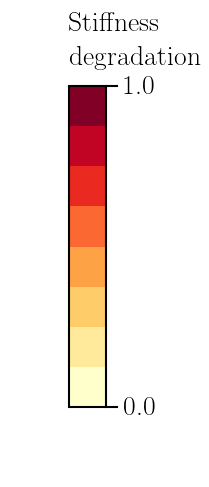

In [8]:
###### USER INPUT #########################################

name = "Stiffness\ndegradation" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = YlOrRd

# set the max, min and number of divisons
max_value = 1
min_value = 0
nval = 1 # the number of range annotations

div = 8 # the number of divisions in the colormap legend

###### GLOBAL FONT SETTINGS ##############################

# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # uses Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(1,5)) # change the size of the legend 

ax = plt.subplot(1, 1, 1)

im = ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
trans_data = mtransforms.Affine2D().rotate_deg(90)+ ax.transData
im.set_transform(trans_data)
    
ax.set_xlim(-0.11,0.1)
ax.set_ylim(-0.1,1.1)

rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
rect.set_transform(trans_data)
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# horizontal lines and values
# for d in np.arange(div+1):
#     ax.plot((-0.1,0.03),(d/div,d/div),'k-',lw=1.5) # (un)comment to use vertical separators
    
for v,i in zip(values,np.arange(nval+1)):
    ax.plot((0,0.03),(i/nval,i/nval),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
    ax.annotate('{0:.1f}'.format(v),xy=(0.05,i/nval),ha='left',va='center') # (un)comment to use horizontal annotations
#     ax.annotate('{0:.2e}'.format(v),xy=(0.02,i/nval),ha='left',va='top',rotation=-30) # (un)comment to rotated annotations

# ax.annotate('{0}'.format(min_value),xy=(-0.05,-0.02),ha='center',va='top') # (un)comment to use min/max values on the side
# ax.annotate('{0}'.format(max_value),xy=(-0.05,1.02),ha='center',va='bottom') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(-0.1,1.05),ha='left',va='bottom',fontsize=None) # specify the fontsize if diff than default
# add/remove bbox=dict(facecolor='none', edgecolor='k') to box/unbox the text

###### SAVE FIGURE ##########################################

savefig('example5.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

## Example 6

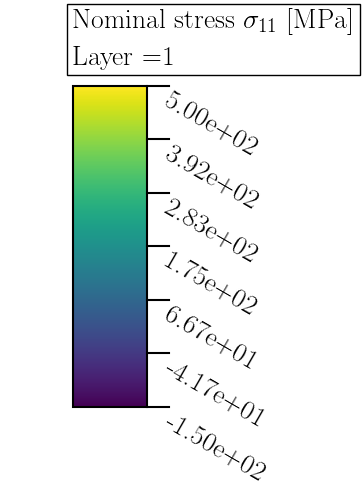

In [9]:
###### USER INPUT #########################################


name = "Nominal stress $\sigma_{11}$ [MPa]\nLayer =1" # set the name

# set the color map - see the showcase. To use a reverse order simply add _r to the color map name, e.g. "winter_r"
colormap = viridis

# set the max, min and number of divisons
max_value = 500
min_value = -150
nval = 6 # the number of range annotations

div = 256 # the number of divisions in the colormap legend (256 is max value!)
###### GLOBAL FONT SETTINGS ##############################

# font setting
font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 20} 
mpl.rc('font', **font)
mpl.rc('text', usetex=True) # uses Latex compiler for text

###### PLOT COLORSCHEME ##################################

values = np.linspace(min_value,max_value,nval+1)

a = np.linspace(0, 1, div).reshape(1,-1)
a = np.vstack((a,a))

fig, ax = plt.subplots(figsize=(2,5)) # change the size of the legend 

ax = plt.subplot(1, 1, 1)

im = ax.imshow(a, aspect='auto', cmap=plt.get_cmap(colormap), origin='lower',extent=(0,1,0,0.1))
trans_data = mtransforms.Affine2D().rotate_deg(90)+ ax.transData
im.set_transform(trans_data)
    
ax.set_xlim(-0.11,0.1)
ax.set_ylim(-0.1,1.1)

rect = patches.Rectangle((0,0),1,0.1,linewidth=1.5,edgecolor='k',facecolor='none')
rect.set_transform(trans_data)
ax.add_patch(rect)
ax.axis("off")

###### CONFIGURE ANNOTATIONS ETC ######################

# horizontal lines and values
# for d in np.arange(div+1):
#     ax.plot((-0.1,0.03),(d/div,d/div),'k-',lw=1.5) # (un)comment to use vertical separators
    
for v,i in zip(values,np.arange(nval+1)):
    ax.plot((0,0.03),(i/nval,i/nval),'k-',lw=1.5) # (un)comment to use vertical separators for gradient legend
#     ax.annotate('{0:.1f}'.format(v),xy=(0.05,i/nval),ha='left',va='center') # (un)comment to use horizontal annotations
    ax.annotate('{0:.2e}'.format(v),xy=(0.02,i/nval),ha='left',va='top',rotation=-30) # (un)comment to rotated annotations

# ax.annotate('{0}'.format(min_value),xy=(-0.05,-0.02),ha='center',va='top') # (un)comment to use min/max values on the side
# ax.annotate('{0}'.format(max_value),xy=(-0.05,1.02),ha='center',va='bottom') # (un)comment to use min/max values on the side

ax.annotate('{0}'.format(name),xy=(-0.1,1.05),ha='left',va='bottom',bbox=dict(facecolor='none', edgecolor='k'),fontsize=None) # specify the fontsize if diff than default
# add/remove bbox=dict(facecolor='none', edgecolor='k') to box/unbox the text

###### SAVE FIGURE ##########################################

savefig('example6.pdf', bbox_inches='tight',dpi=300, edgecolor='k', frameon=False) # (un)comment to save legend or not, up to you...

# Export
## Export color maps for abaqus

In [10]:
##### USER INPUT ##########################################
# create a list of color maps to export
colormaps = ('viridis', 'viridis_r','plasma','plasma_r')

############################################################
template = open ('abaqus_v6.env', 'w')
template.write('def onCaeStartup():\n')
template.write('\tdef setVisPreferences(module, userData):\n')
template.write('\t\timport visualization\n')
for cm in colormaps:
    mp=[np.int(x) for x in np.linspace(1, 256, 6)]
    col = [rgb2hex(x) for x in plt.get_cmap(cm)(mp)]
    template.write("\t\tsession.Spectrum(name=\"{0}\", colors =('{1}', ))\n".format(cm,("', '".join(col))))
template.write('\t\tsession.defaultOdbDisplay.contourOptions.setValues(spectrum="{0}")\n'.format(colormaps[0])) # set the default colormap!!!
template.write("\taddImportCallback('visualization', setVisPreferences)\n")
template.close()
###########################################################

# place the abaqus_v6.env file into your home directory